In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
df=pd.read_excel("G:/r_data/Sample - Superstore.xls")

In [0]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [0]:
furniture=df.loc[df['Category']=='furniture']

In [0]:
df1=df

In [0]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [0]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [0]:
df['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [0]:
df['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [0]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [0]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(cols, axis=1, inplace=True)
furniture = df.sort_values('Order Date')

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [0]:
furniture.head()

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [0]:
df

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
5,2014-06-09,48.8600
6,2014-06-09,7.2800
7,2014-06-09,907.1520
8,2014-06-09,18.5040
9,2014-06-09,114.9000


In [0]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [0]:
df3=df.set_index('Order Date')

In [0]:
df3.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2016-06-12', '2015-10-11',
               '2015-10-11', '2014-06-09', '2014-06-09', '2014-06-09',
               '2014-06-09', '2014-06-09',
               ...
               '2015-05-17', '2015-05-17', '2016-09-29', '2017-11-17',
               '2017-11-17', '2014-01-21', '2017-02-26', '2017-02-26',
               '2017-02-26', '2017-05-04'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [0]:
y=df3['Sales'].resample('MS').mean()

In [0]:
y

Order Date
2014-01-01    180.213861
2014-02-01     98.258522
2014-03-01    354.719803
2014-04-01    209.595148
2014-05-01    193.838418
2014-06-01    256.260204
2014-07-01    237.387364
2014-08-01    182.414827
2014-09-01    305.139369
2014-10-01    197.820082
2014-11-01    247.260115
2014-12-01    250.164103
2015-01-01    313.346131
2015-02-01    186.740797
2015-03-01    280.625014
2015-04-01    213.720053
2015-05-01    206.381414
2015-06-01    179.690522
2015-07-01    205.466607
2015-08-01    232.064982
2015-09-01    220.463884
2015-10-01    189.186286
2015-11-01    234.483221
2015-12-01    237.087092
2016-01-01    208.342596
2016-02-01    276.853193
2016-03-01    317.275307
2016-04-01    227.941406
2016-05-01    253.278791
2016-06-01    202.736352
2016-07-01    195.333149
2016-08-01    176.791899
2016-09-01    202.231474
2016-10-01    304.529311
2016-11-01    214.626935
2016-12-01    275.565463
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    

In [0]:
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

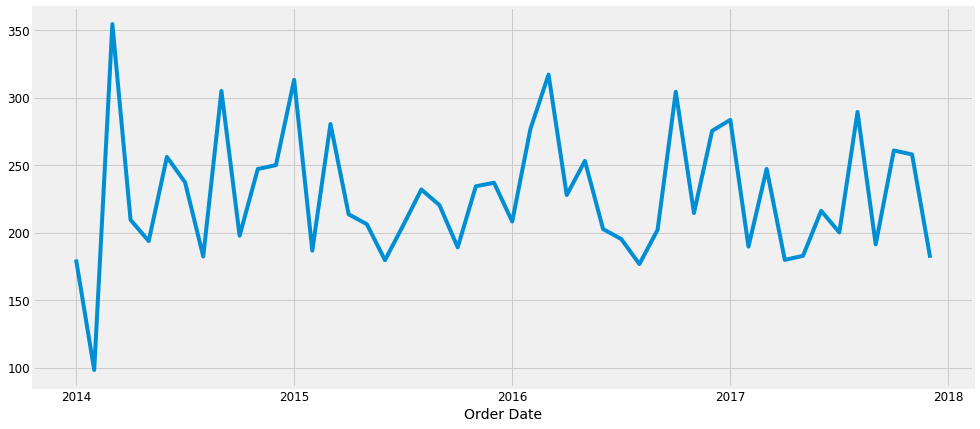

In [0]:
y.plot(figsize=(15,7))

In [0]:
from pylab import rcParams

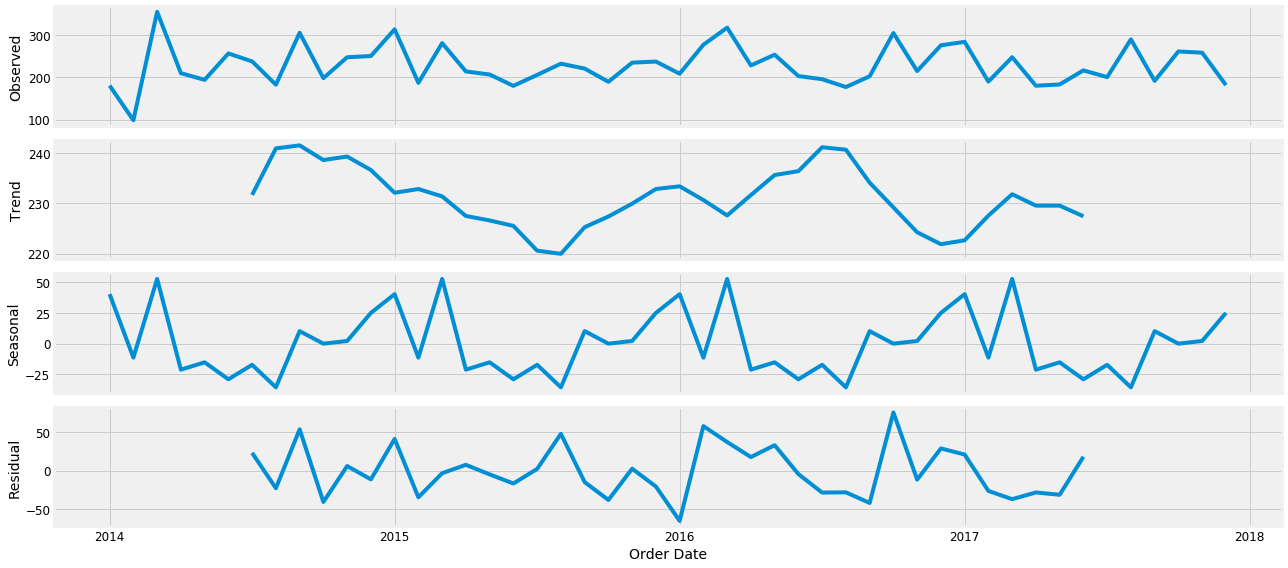

In [0]:
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomposition.plot()

In [0]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))

In [0]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [0]:
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [0]:
print('sarime:{} * {}'.format(pdq[1],seasonal_pdq[1]))

sarime:(0, 0, 1) * (0, 0, 1, 12)


In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0754      0.251     -0.300      0.764      -0.567       0.417
ma.L1         -1.0000   1659.490     -0.001      1.000   -3253.541    3251.541
ar.S.L12      -0.5256      0.180     -2.919      0.004      -0.878      -0.173
sigma2      2305.2200   3.83e+06      0.001      1.000    -7.5e+06     7.5e+06


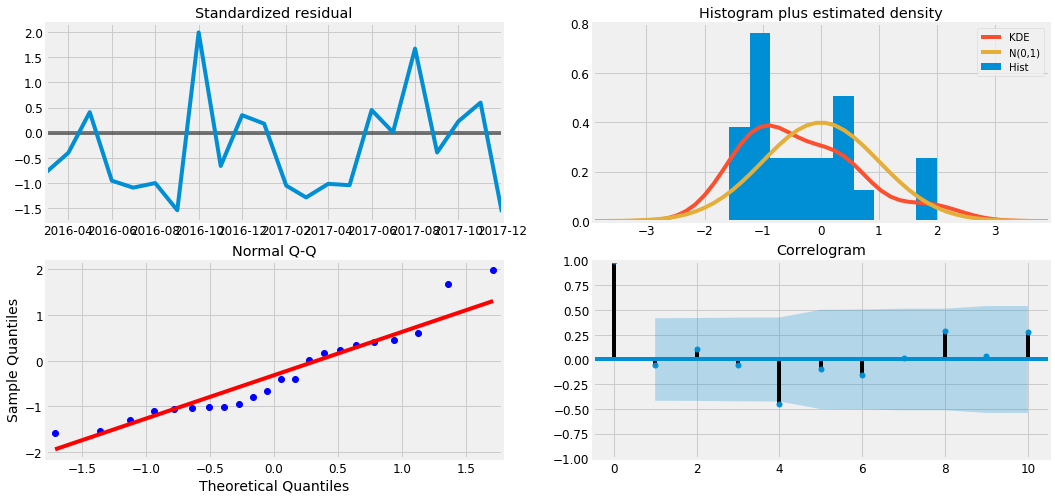

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

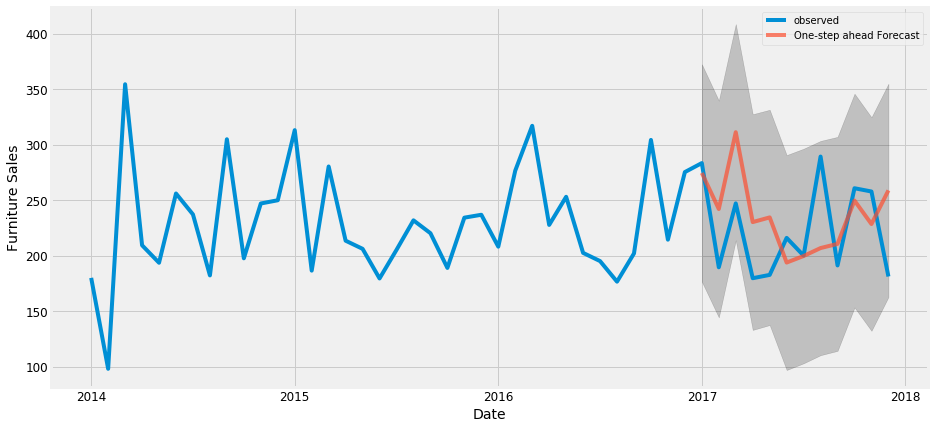

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

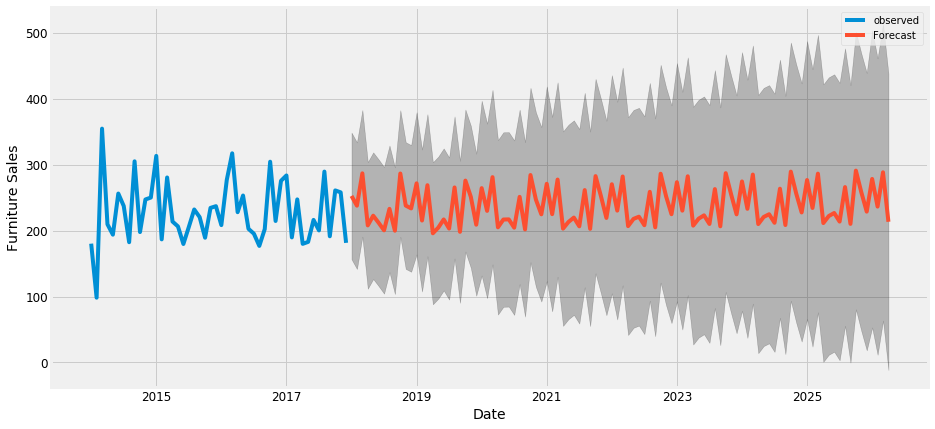

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [0]:
from datetime import datetime

In [0]:
datetime(2018,10,24)

datetime.datetime(2018, 10, 24, 0, 0)

In [0]:
from dateutil import parser

In [0]:
parser.parse("24 October, 2018")

datetime.datetime(2018, 10, 24, 0, 0)

In [0]:
import numpy as np

In [0]:
data=np.array('2018-10-24',dtype=np.datetime64)

In [0]:
data

array('2018-10-24', dtype='datetime64[D]')

In [0]:
data+np.arange(10)

array(['2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27',
       '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31',
       '2018-11-01', '2018-11-02'], dtype='datetime64[D]')

In [0]:
import pandas as pd

In [0]:
date=pd.to_datetime('2018-10-24')
date

Timestamp('2018-10-24 00:00:00')

In [0]:
date+pd.to_timedelta(np.arange(10))

DatetimeIndex(['2018-10-24', '2018-10-24', '2018-10-24', '2018-10-24',
               '2018-10-24', '2018-10-24', '2018-10-24', '2018-10-24',
               '2018-10-24', '2018-10-24'],
              dtype='datetime64[ns]', freq=None)

In [0]:
date+pd.to_timedelta(np.arange(10),'D')


DatetimeIndex(['2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27',
               '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02'],
              dtype='datetime64[ns]', freq=None)

In [0]:
date+pd.to_timedelta(np.arange(10),'Y')

DatetimeIndex(['2018-10-24 00:00:00', '2019-10-24 05:49:12',
               '2020-10-23 11:38:24', '2021-10-23 17:27:36',
               '2022-10-23 23:16:48', '2023-10-24 05:06:00',
               '2024-10-23 10:55:12', '2025-10-23 16:44:24',
               '2026-10-23 22:33:36', '2027-10-24 04:22:48'],
              dtype='datetime64[ns]', freq=None)

In [0]:
index=pd.DatetimeIndex(['2018-10-24','2018-10-25','2018-10-26'])

In [0]:
index

DatetimeIndex(['2018-10-24', '2018-10-25', '2018-10-26'], dtype='datetime64[ns]', freq=None)

In [0]:
series=pd.Series([1,2,3],index=index)
series

2018-10-24    1
2018-10-25    2
2018-10-26    3
dtype: int64

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

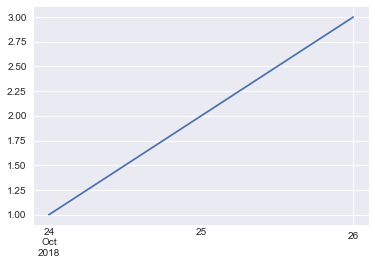

In [0]:

series.plot()

In [0]:
series['2018']

2018-10-24    1
2018-10-25    2
2018-10-26    3
dtype: int64

In [0]:
series['2018-10-24']

1

In [0]:
pd.date_range('2018-1-1',periods=363,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=363, freq='D')

In [0]:
pd.date_range('2018-10-24',periods=8,freq='H')

DatetimeIndex(['2018-10-24 00:00:00', '2018-10-24 01:00:00',
               '2018-10-24 02:00:00', '2018-10-24 03:00:00',
               '2018-10-24 04:00:00', '2018-10-24 05:00:00',
               '2018-10-24 06:00:00', '2018-10-24 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [0]:
pd.date_range('2018-10',periods=12,freq='M')

DatetimeIndex(['2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [0]:
from pandas_datareader import data

ImportError: cannot import name 'is_list_like'

In [0]:
data=pd.read_csv("G:/r_data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv")

In [0]:
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [0]:
data=pd.read_csv("G:/r_data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv",index_col='Date',parse_dates=True)

In [0]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [0]:
data.columns=['west','east']

In [0]:
data['total']=data.eval('west + east')

In [0]:
data.head()

,west,east,total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [0]:
data.dropna().describe()

,west,east,total
count,52527.000000,52527.000000,52527.000000
mean,57.563101,54.091343,111.654444
std,83.086986,70.726110,140.493300
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


In [0]:
import seaborn as sb

In [0]:
sb.set()

Text(0,0.5,'hourly ')

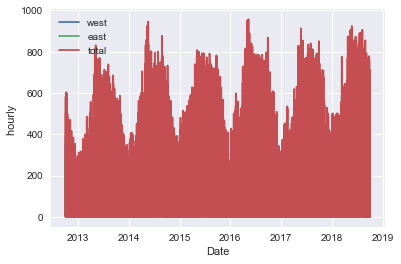

In [0]:
data.plot()
plt.ylabel('hourly ')

Text(0,0.5,'weekly')

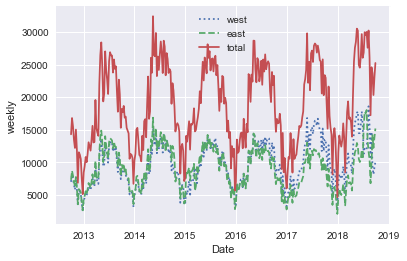

In [0]:
weekly=data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('weekly')

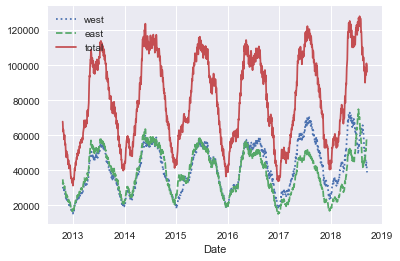

In [0]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])

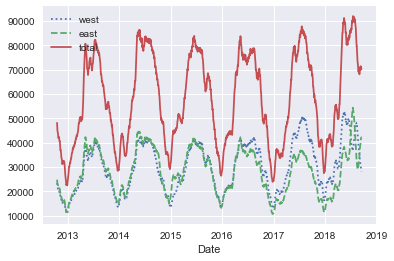

In [0]:

daily.rolling(30,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

In [0]:
4*60*60*np.array(6)

86400

In [0]:
data.shape

(52536, 3)

In [0]:
by_time=data.groupby(data.index.time).mean()

In [0]:
hl=4*60*60*np.arange(6)
hl

array([    0, 14400, 28800, 43200, 57600, 72000])

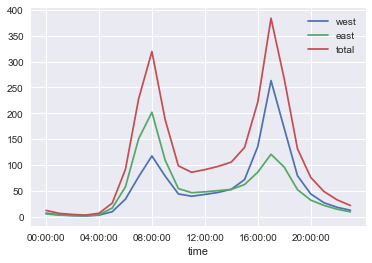

In [0]:
by_time.plot(xticks=hl)

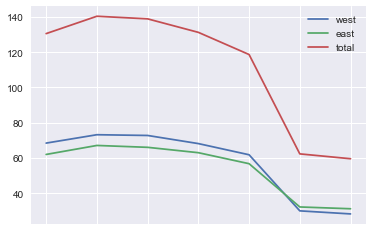

In [0]:
by_day=data.groupby(data.index.dayofweek).mean()
by_day.index=['mon','tues','wed','thurs','fri','sat','sun']
by_day.plot()

In [0]:
from pandas_datareader import data

In [0]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [0]:
from fbprophet import Prophet

In [0]:
import pandas as pd

In [0]:
data=pd.read_html("https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv")

In [0]:
df=data[0]

In [0]:
df1=df.set_index('ds')

In [0]:
df1.head()

,Unnamed: 0,y
ds,,
2007-12-10,NaN,9.590761
2007-12-11,NaN,8.519590
2007-12-12,NaN,8.183677
2007-12-13,NaN,8.072467
2007-12-14,NaN,7.893572


In [0]:
df1.drop(df.columns[[0]],axis=1,inplace=True)

In [0]:
df1.head()

,y
ds,
2007-12-10,9.590761
2007-12-11,8.519590
2007-12-12,8.183677
2007-12-13,8.072467
2007-12-14,7.893572


In [0]:
df1.columns

Index(['y'], dtype='object')

In [0]:
df.head()

,Unnamed: 0,ds,y
0,NaN,2007-12-10,9.590761
1,NaN,2007-12-11,8.519590
2,NaN,2007-12-12,8.183677
3,NaN,2007-12-13,8.072467
4,NaN,2007-12-14,7.893572


In [0]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [0]:
m=Prophet()

In [0]:
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\AppData\Local\conda\conda\envs\geospatial\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [0]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [0]:
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
3630,2018-01-15
3631,2018-01-16
3632,2018-01-17
3633,2018-01-18
3634,2018-01-19


In [0]:
365*2

730

In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3630,2018-01-15,8.125349,6.936958,9.331674
3631,2018-01-16,7.913900,6.740019,9.141871
3632,2018-01-17,7.747907,6.583607,8.925499
3633,2018-01-18,7.761504,6.541566,8.928669
3634,2018-01-19,7.782083,6.531310,9.112420


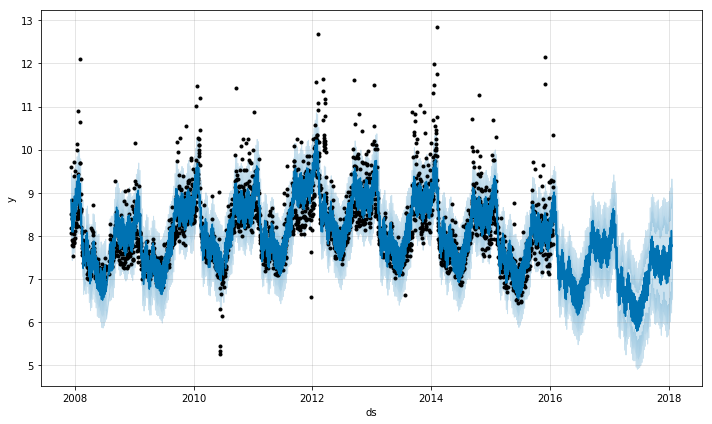

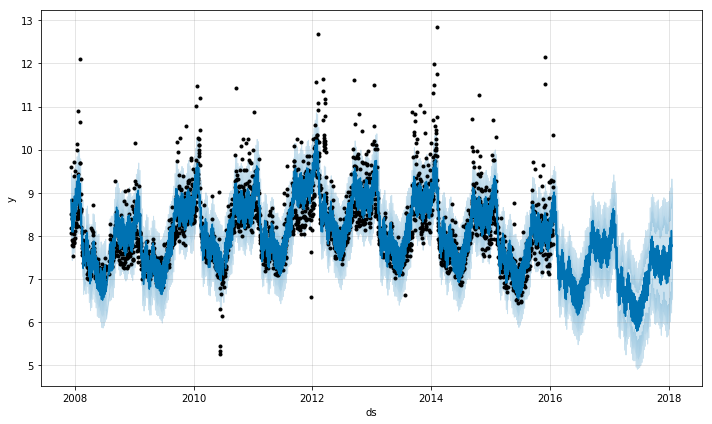

In [0]:
m.plot(forecast)

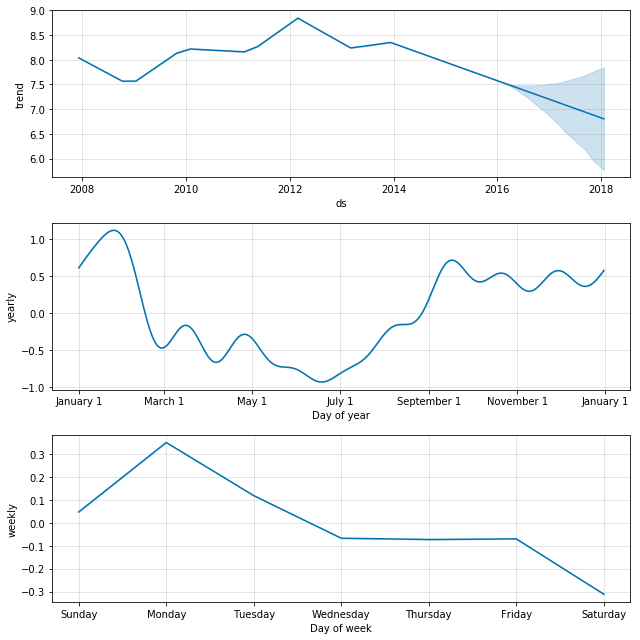

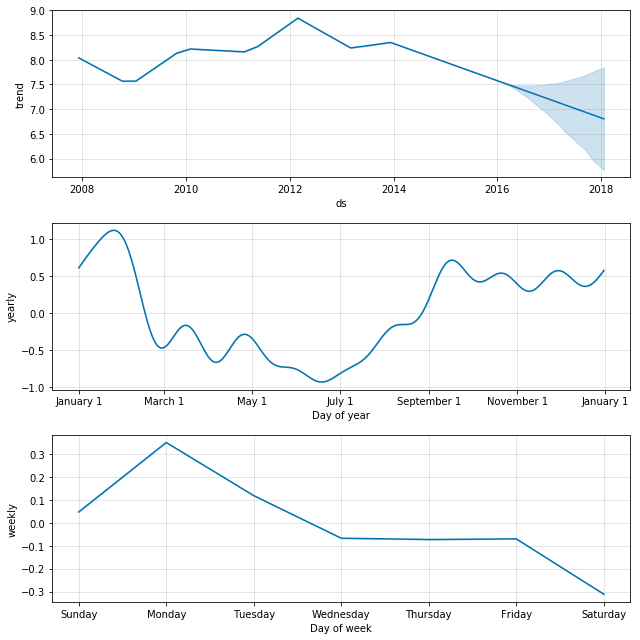

In [0]:
m.plot_components(forecast)